[@LorenaABarba](https://twitter.com/LorenaABarba)

(La cellule ci-dessous exécute le style de ce bloc-notes. Nous avons modifié un style que nous avons trouvé sur le GitHub de [CamDavidsonPilon](https://github.com/CamDavidsonPilon), [@Cmrn_DP](https://twitter.com/cmrn_dp).)


In [7]:
from IPython.core.display import HTML
def css_styling():
    styles = open("../styles/custom.css", "r").read()
    return HTML(styles)
css_styling()

**12 étapes vers Navier–Stokes**
=====
***

Dans l'étape précédente, nous avons résolu l'[équation de Burgers 2D](./10_Step_8.ipynb) : une équation importante dans l'étude de la mécanique des fluides car elle contient la non-linéarité convective complète des équations d'écoulement. Avec cet exercice, nous construisons également l'expérience nécessaire pour coder de manière incrémentale un solveur Navier-Stokes.

Dans les deux prochaines étapes, nous allons résoudre l'équation de Laplace puis de Poisson. Nous mettrons ensuite tout cela ensemble !

Etape 9: Equation de  Laplace  en 2D
----
***

Here is Laplace's equation in 2D:

$$\frac{\partial ^2 p}{\partial x^2} + \frac{\partial ^2 p}{\partial y^2} = 0$$

We know how to discretize a 2nd order derivative. But think about this for a minute — Laplace's equation has the features typical of diffusion phenomena. For this reason, it has to be discretized with *central differences*, so that the discretization is consistent with the physics we want to simulate. 

The discretized equation is:

$$\frac{p_{i+1, j}^n - 2p_{i,j}^n + p_{i-1,j}^n}{\Delta x^2} + \frac{p_{i,j+1}^n - 2p_{i,j}^n + p_{i, j-1}^n}{\Delta y^2} = 0$$

Notice that the Laplace Equation does not have a time dependence — there is no $p^{n+1}$.  Instead of tracking a wave through time (like in the previous steps), the Laplace equation calculates the equilibrium state of a system under the supplied boundary conditions.  

If you have taken coursework in Heat Transfer, you will recognize the Laplace Equation as the steady-state heat equation.  

Instead of calculating where the system will be at some time $t$, we will iteratively solve for $p_{i,j}^n$ until it meets a condition that we specify.  The system will reach equilibrium only as the number of iterations tends to $\infty$, but we can approximate the equilibrium state by iterating until the change between one iteration and the next is *very* small.  

Let's rearrange the discretized equation, solving for $p_{i,j}^n$:

$$p_{i,j}^n = \frac{\Delta y^2(p_{i+1,j}^n+p_{i-1,j}^n)+\Delta x^2(p_{i,j+1}^n + p_{i,j-1}^n)}{2(\Delta x^2 + \Delta y^2)}$$

Using second-order central-difference schemes in both directions is the most widely applied method for the Laplace operator. It is also known as the **five-point difference operator**, alluding to its stencil.

Voici l'équation de Laplace en 2D :

$$\frac{\partial ^2 p}{\partial x^2} + \frac{\partial ^2 p}{\partial y^2} = 0$$

On sait comment discrétiser une dérivée d'ordre 2. Mais pensez-y une minute - l'équation de Laplace a les caractéristiques typiques des phénomènes de diffusion. Pour cette raison, il doit être discrétisé avec des *différences centrales*, afin que la discrétisation soit cohérente avec la physique que nous voulons simuler.

L'équation discrétisée est :

$$\frac{p_{i+1, j}^n - 2p_{i,j}^n + p_{i-1,j}^n}{\Delta x^2} + \frac{p_{i ,j+1}^n - 2p_{i,j}^n + p_{i, j-1}^n}{\Delta y^2} = 0$$

Notez que l'équation de Laplace n'a pas de dépendance temporelle — il n'y a pas de $p^{n+1}$. Au lieu de suivre une onde dans le temps (comme dans les étapes précédentes), l'équation de Laplace calcule l'état d'équilibre d'un système dans les conditions aux limites fournies.

Si vous avez suivi des cours sur le transfert de chaleur, vous reconnaîtrez l'équation de Laplace comme l'équation de la chaleur en régime permanent.

Au lieu de calculer où se trouvera le système à un moment donné $t$, nous allons résoudre itérativement pour $p_{i,j}^n$ jusqu'à ce qu'il remplisse une condition que nous spécifions. Le système n'atteindra l'équilibre que lorsque le nombre d'itérations tendra vers $\infty$, mais nous pouvons approximer l'état d'équilibre en itérant jusqu'à ce que le changement entre une itération et la suivante soit *très* petit.

Réorganisons l'équation discrétisée, en résolvant pour $p_{i,j}^n$ :

$$p_{i,j}^n = \frac{\Delta y^2(p_{i+1,j}^n+p_{i-1,j}^n)+\Delta x^2(p_ {i,j+1}^n + p_{i,j-1}^n)}{2(\Delta x^2 + \Delta y^2)}$$

L'utilisation de schémas de différence centrale du second ordre dans les deux sens est la méthode la plus largement appliquée pour l'opérateur de Laplace. Il est également connu sous le nom d'**opérateur de différence en cinq points**, faisant allusion à son pochoir.

Nous allons résoudre numériquement l'équation de Laplace en supposant un état initial de $p=0$ partout. Ensuite, nous ajoutons des conditions aux limites comme suit :

$p=0$ à $x=0$

$p=y$ à $x=2$

$\frac{\partial p}{\partial y}=0$ à $y=0, \ 1$

Dans ces conditions, il existe une solution analytique de l'équation de Laplace :

$$p(x,y)=\frac{x}{4}-4\sum_{n=1,odd}^{\infty}\frac{1}{(n\pi)^2\sinh2n\pi }\sinh n\pi x\cos n\pi y$$

##### **Exercice**

Écrivez votre propre code pour résoudre l'équation de Poisson à l'aide de boucles, dans le style de codage utilisé dans nos premières leçons. Ensuite, considérez la démonstration de la façon de l'écrire à l'aide de fonctions (ci-dessous) et modifiez votre code dans ce style. **Pouvez-vous penser à des raisons d'abandonner l'ancien style et d'adopter le codage modulaire ?**

Autres conseils :

+ **Visualisez chaque étape du processus itératif**
+ **Réfléchissez à ce que font les conditions aux limites**
+ **Réfléchissez à ce que fait le PDE**

### Utilisation des fonctions

Vous souvenez-vous de la leçon sur l'écriture de [fonctions avec Python](./11_Defining_Function_in_Python.ipynb) ? Nous utiliserons ce style de code dans cet exercice.

Nous allons définir deux fonctions : l'une qui trace nos données dans un graphes 3D et l'autre qui itère pour trouver $p$ jusqu'à ce que le changement de [L1 Norm][1] de $p$ soit inférieur à une valeur spécifiée.

[1] : http://en.wikipedia.org/wiki/Norm_(mathematics)#Taxicab_norm_or_Manhattan_norm

In [8]:
import numpy
from matplotlib import pyplot, cm
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [9]:
def plot2D(x, y, p):
    fig = pyplot.figure(figsize=(11, 7), dpi=100)
    #ax = fig.gca(projection='3d')
    ax = fig.add_subplot(projection='3d')
    X, Y = numpy.meshgrid(x, y)
    surf = ax.plot_surface(X, Y, p[:], rstride=1, cstride=1, cmap=cm.viridis,
            linewidth=0, antialiased=False)
    ax.set_xlim(0, 2)
    ax.set_ylim(0, 1)
    ax.view_init(30, 225)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')


The function `plot2D` takes three arguments, an x-vector, a y-vector and our p matrix.  Given these three values, it produces a 3D projection plot, sets the plot limits and gives us a nice viewing angle.  

La fonction `plot2D` prend trois arguments, un vecteur x, un vecteur y et notre matrice p. Compte tenu de ces trois valeurs, il produit un graphe 3D, définit les limites du tracé et nous donne un bel angle de vue.

$$p_{i,j}^n = \frac{\Delta y^2(p_{i+1,j}^n+p_{i-1,j}^n)+\Delta x^2(p_{i,j+1}^n + p_{i,j-1}^n)}{2(\Delta x^2 + \Delta y^2)}$$

In [10]:
def laplace2d(p, y, dx, dy, l1norm_target):
    l1norm = 1
    pn = numpy.empty_like(p)

    while l1norm > l1norm_target:
        pn = p.copy()
        p[1:-1, 1:-1] = ((dy**2 * (pn[1:-1, 2:] + pn[1:-1, 0:-2]) +
                         dx**2 * (pn[2:, 1:-1] + pn[0:-2, 1:-1])) /
                        (2 * (dx**2 + dy**2)))
            
        p[:, 0] = 0  # p = 0 @ x = 0
        p[:, -1] = y  # p = y @ x = 2
        p[0, :] = p[1, :]  # dp/dy = 0 @ y = 0
        p[-1, :] = p[-2, :]  # dp/dy = 0 @ y = 1
        l1norm = (numpy.sum(numpy.abs(p[:]) - numpy.abs(pn[:])) /
                numpy.sum(numpy.abs(pn[:])))
     
    return p

`laplace2d` prend cinq arguments, la matrice `p`, le vecteur `y`, `dx`, `dy` et la valeur `l1norm_target`. Cette dernière valeur définit à quel point la matrice `p` doit être proche dans deux itérations consécutives avant que la boucle ne se rompe et renvoie la valeur `p` calculée.

Notez que lors de l'exécution des cellules ci-dessus dans votre propre cahier, il n'y aura pas de sortie. Vous avez *défini* la fonction mais vous n'avez pas encore *appelé* la fonction. Il est maintenant disponible pour vous, de la même manière que `numpy.linspace` ou toute autre fonction de notre espace de noms.

In [11]:
## déclarations des variables
nx = 31
ny = 31
c = 1
dx = 2 / (nx - 1)
dy = 2 / (ny - 1)


## conditions initiales
p = numpy.zeros((ny, nx))  # créer un vecteur XxY remplis de zéros


##aides au traçage
x = numpy.linspace(0, 2, nx)
y = numpy.linspace(0, 1, ny)

## conditions aux limites
p[:, 0] = 0  # p = 0 @ x = 0
p[:, -1] = y  # p = y @ x = 2
p[0, :] = p[1, :]  # dp/dy = 0 @ y = 0
p[-1, :] = p[-2, :]  # dp/dy = 0 @ y = 1

Essayons maintenant d'utiliser notre fonction `plot2D` pour examiner nos conditions initiales. Si la fonction a été correctement définie, vous devriez pouvoir commencer à taper "plot2D" et appuyer sur la touche **tab** pour les options de saisie semi-automatique.

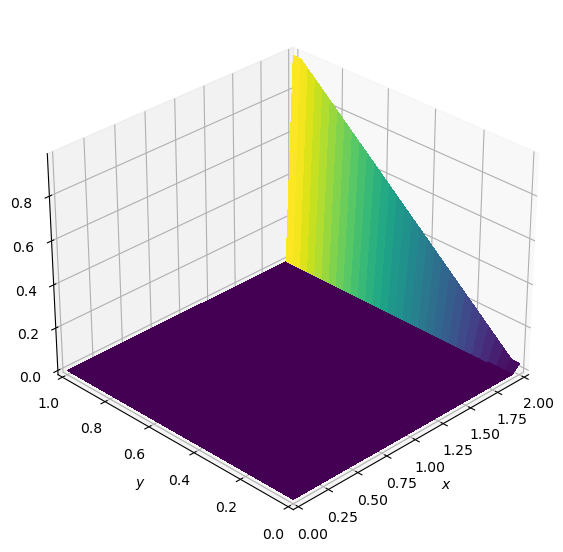

In [12]:
plot2D(x, y, p)

Ça a marché! C'est l'état initial de notre problème, où la valeur de `p` est nulle partout sauf le long de $x=2$ où $p=y$. Essayons maintenant d'exécuter notre fonction `laplace2d` avec une cible L1 spécifiée de 0,01

[**Astuce** : si vous avez du mal à vous souvenir de l'ordre dans lequel les variables sont envoyées à une fonction, vous pouvez simplement taper `laplace2d(` et le iPython Notebook affichera une petite boîte de dialogue pour vous le rappeler]

In [13]:
p = laplace2d(p, y, dx, dy, 1e-4)

Now try plotting this new value of `p` with our plot function.

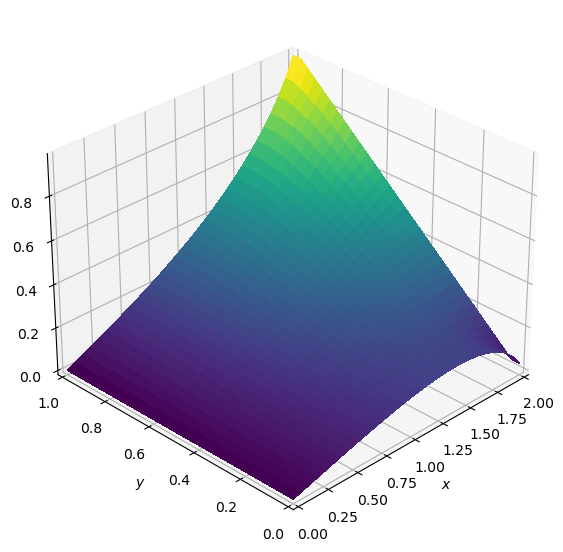

In [14]:
plot2D(x, y, p)

***

##  Pour en savoir plus

La [prochaine étape](./13_FR_Step_10.ipynb) consistera à résoudre l'équation de Poisson. Regardez **Leçon vidéo 11** sur You Tube pour comprendre pourquoi nous avons besoin de l'équation de Poisson en CFD.

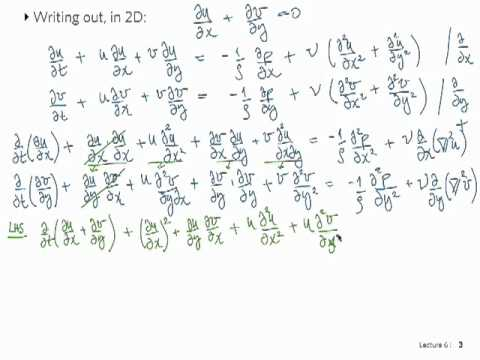

In [15]:
from IPython.display import YouTubeVideo
YouTubeVideo('ZjfxA3qq2Lg')

Et pour une présentation détaillée de la discrétisation des équations de Laplace et de Poisson (étapes 9 et 10), regardez la **leçon vidéo 12** sur You Tube :

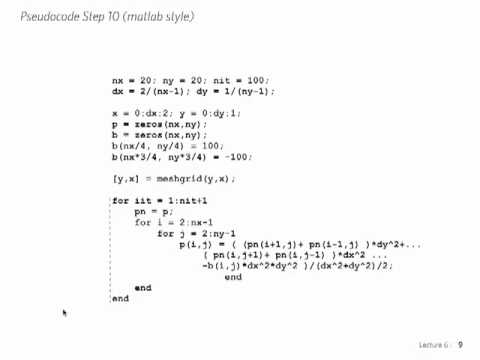

In [16]:
from IPython.display import YouTubeVideo
YouTubeVideo('iwL8ashXhWU')

In [17]:
from IPython.core.display import HTML
def css_styling():
    styles = open("../styles/custom.css", "r").read()
    return HTML(styles)
css_styling()

> (La cellule ci-dessus exécute le style de ce bloc-notes.)